<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_2_13_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2_%EB%82%A0%EC%94%A8_%EC%A2%8B%EC%9D%80_%EC%9B%94%EC%9A%94%EC%9D%BC_%EC%98%A4%ED%9B%84_%EC%84%B8_%EC%8B%9C%2C_%EC%9E%90%EC%A0%84%EA%B1%B0_%ED%83%80%EB%8A%94_%EC%82%AC%EB%9E%8C%EC%9D%80_%EB%AA%87_%EB%AA%85%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

---
### (1) 데이터 가져오기
* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* [여기](https://www.kaggle.com/c/bike-sharing-demand/data) 에서 데이터를 상세히 확인할 수 있습니다.
---

---
● Bike Sharing Demand

* Forecast use of a city bikeshare system

https://www.kaggle.com/c/bike-sharing-demand/data

---

In [2063]:
import pandas as pd

In [2064]:
path = '/content/drive/MyDrive/_aiffel/aiffel/bike_regression/data/bike-sharing-demand/'
#csv_train_file = 'train.csv'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [2065]:
type(train)

pandas.core.frame.DataFrame

In [2066]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2067]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [2068]:
type(train.columns)

pandas.core.indexes.base.Index

In [2069]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2070]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [2071]:
import missingno as msno

###### train.csv 점검

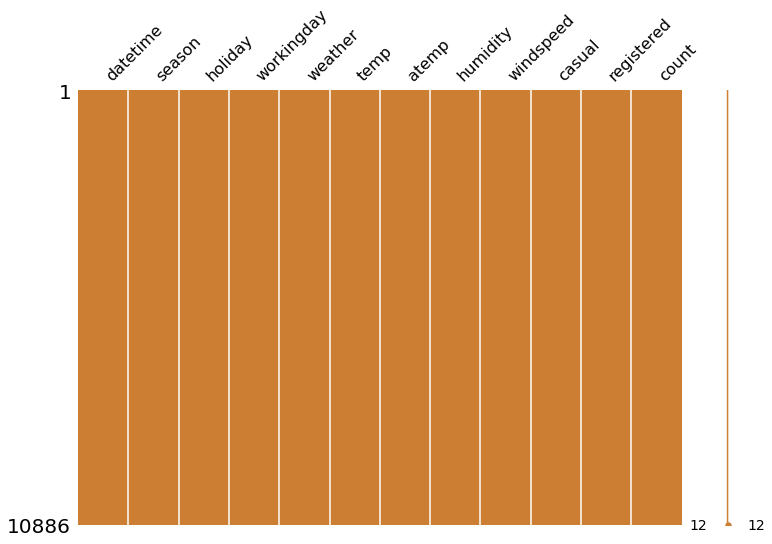

In [2072]:
msno.matrix(df=train.iloc[:, :], figsize=(12, 8), color=(0.8, 0.5, 0.2))

print(train.columns)

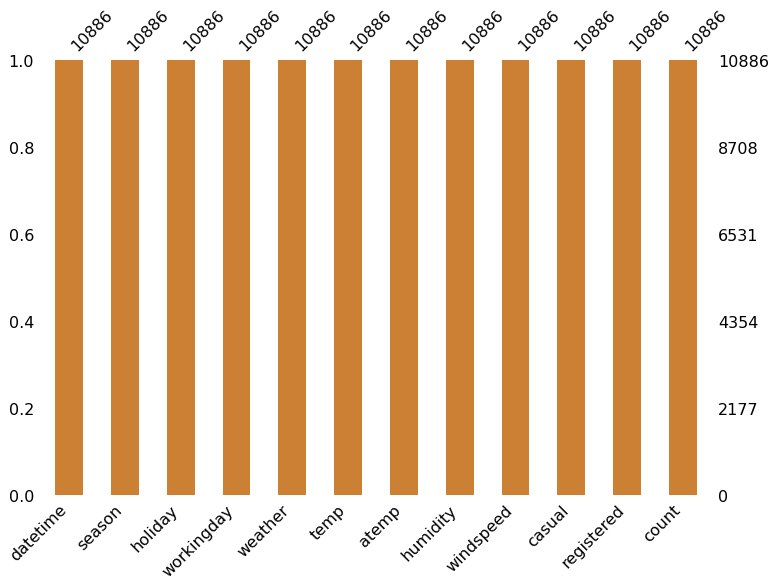

In [2073]:
msno.bar(df=train.iloc[:, :], figsize=(12, 8), color=(0.8, 0.5, 0.2))

casual + registered = count

In [2074]:
# casual + registered = count 임을 확인.
r = range(len(train))
for i in r:
    if(train['casual'][i] + train['registered'][i] != train['count'][i]):
        print('[{}] Not Equal'.format(i))
print('END')

END


###### test.csv 점검

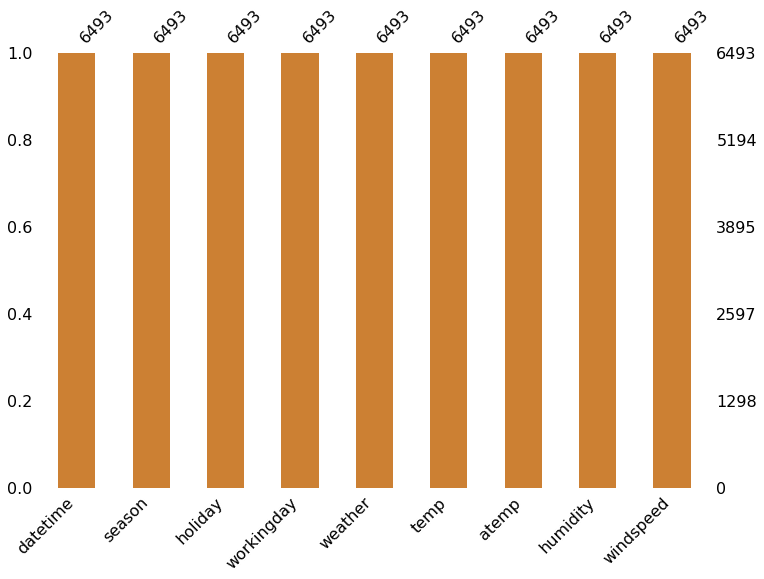

In [2075]:
msno.bar(df=test.iloc[:, :], figsize=(12, 8), color=(0.8, 0.5, 0.2))

test.csv 에는 casul, registered, count 모두 없음.

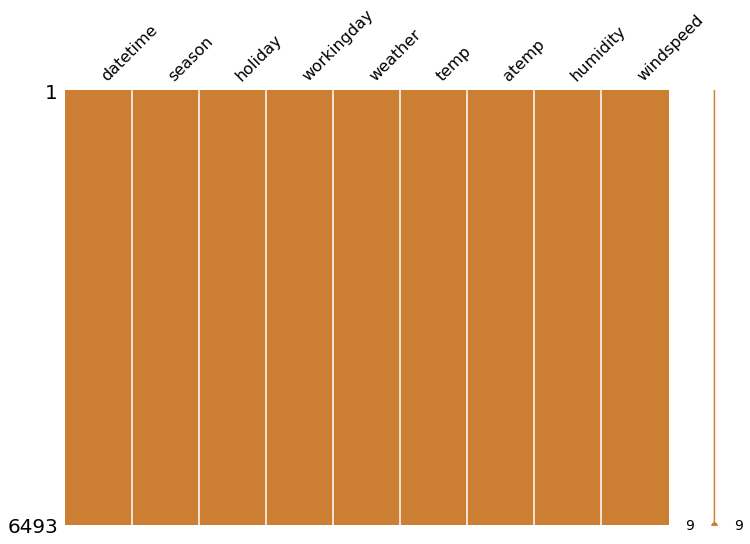

In [2076]:
msno.matrix(df=test.iloc[:, :], figsize=(12, 8), color=(0.8, 0.5, 0.2))

---
### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
* to_datetime 활용 : 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

* pandas datetime extract year month day 키워드로 검색해 보기

---

###### train 의 datetime 컬럼을, year, month, day, hour, minute, second 로 슬라이싱 한다.

In [2077]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [2078]:
type(train['datetime'])

pandas.core.series.Series

In [2079]:
train['datetime'][10882]

'2012-12-19 20:00:00'

In [2080]:
type(train['datetime'][10882])

str

In [2081]:
'''
r = range(len(train['datetime']))
for i in r:
    train['datetime'][i] = (train['datetime'][i]).to_datetime64()
'''

"\nr = range(len(train['datetime']))\nfor i in r:\n    train['datetime'][i] = (train['datetime'][i]).to_datetime64()\n"

In [2082]:
train['datetime'] = pd.to_datetime(train['datetime'])
#train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [2083]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [2084]:
train['datetime'][10882].year

2012

In [2085]:
train['datetime'][10882].month

12

In [2086]:
train['datetime'][10882].day

19

In [2087]:
train['datetime'][10882].hour

20

In [2088]:
train['datetime'][10882].minute

0

In [2089]:
train['datetime'][10882].second

0

In [2090]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [2091]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [2092]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


###### test 의 datetime 컬럼을, year, month, day, hour, minute, second 로 슬라이싱 한다.

In [2093]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [2094]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [2095]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [2096]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  minute      6493 non-null   int64         
 14  second      6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 761.0 KB


---
### (3) year, month, day, hour, minute, second 데이터 개수 시각화 하기
* sns.countplot 활용해서 시각화 하기
* subplot 을 활용해서 한 번에 6개의 그래프 함께 시각화 하기

---

In [2097]:
import seaborn as sns
import matplotlib.pyplot as plt

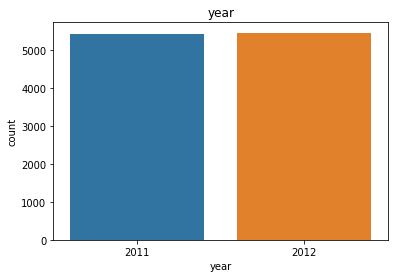

In [2098]:
sns.countplot(x="year", data=train)
plt.title("year")
plt.show()

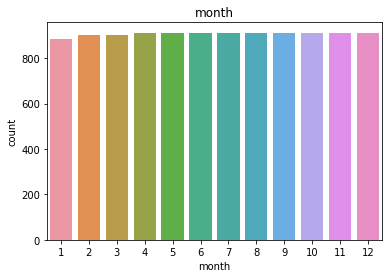

In [2099]:
sns.countplot(x="month", data=train)
plt.title("month")
plt.show()

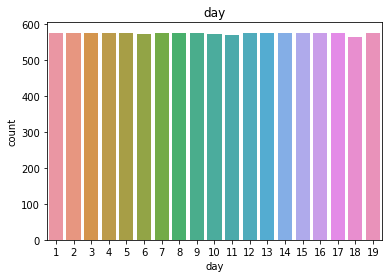

In [2100]:
sns.countplot(x="day", data=train)
plt.title("day")
plt.show()

In [2101]:
set(train['day'].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

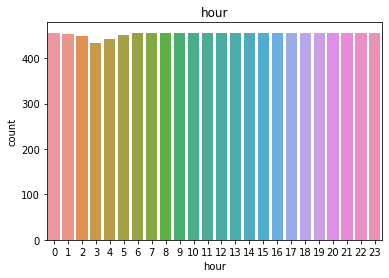

In [2102]:
sns.countplot(x="hour", data=train)
plt.title("hour")
plt.show()

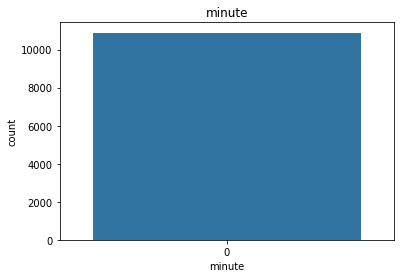

In [2103]:
sns.countplot(x="minute", data=train)
plt.title("minute")
plt.show()

In [2104]:
set(train['minute'].values)

{0}

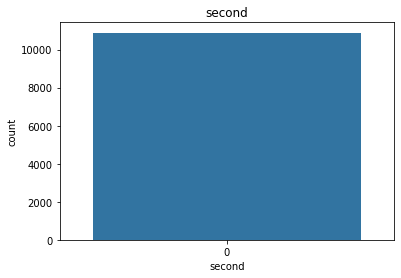

In [2105]:
sns.countplot(x="second", data=train)
plt.title("second")
plt.show()

In [2106]:
set(train['second'].values)

{0}

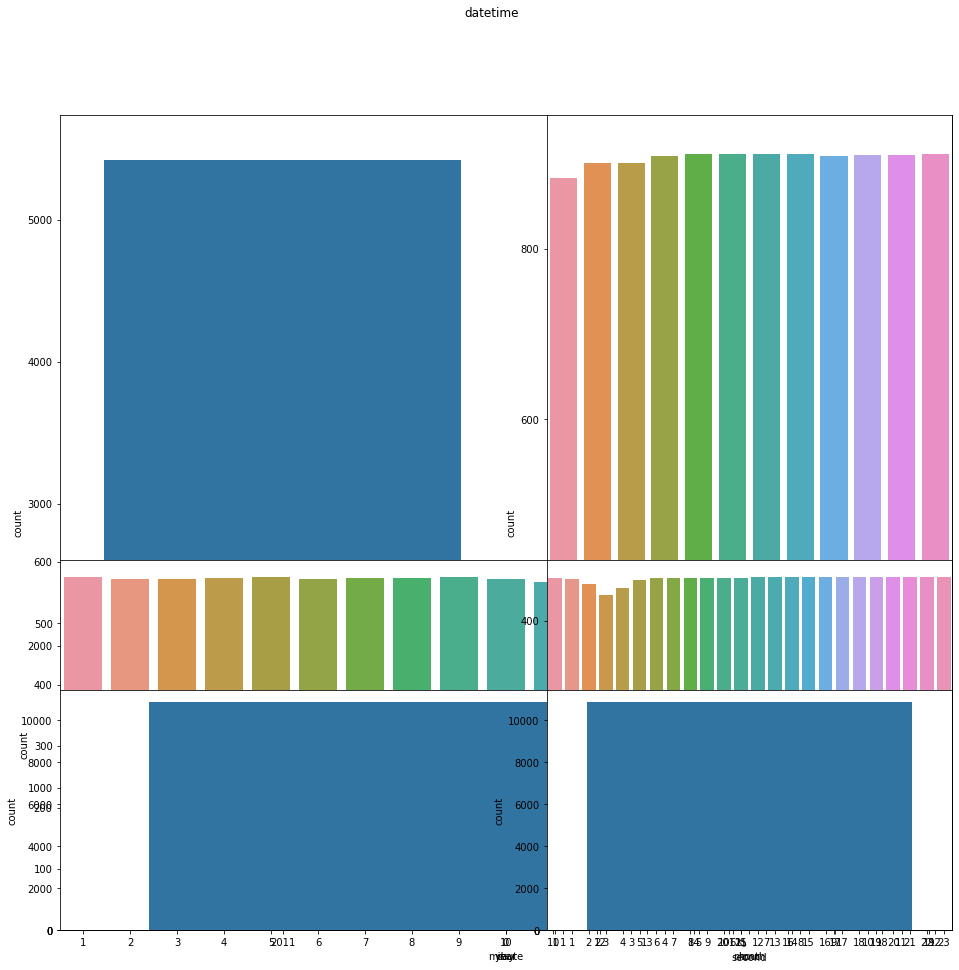

In [2107]:
rows = 3
cols = 2

fig = plt.figure( figsize=(cols*8, rows*5) )

ax = fig.add_subplot(1, 1, 1)
sns.countplot(x="year", data=train)

ax = fig.add_subplot(1, 2, 2)
sns.countplot(x="month", data=train)

ax = fig.add_subplot(2, 1, 2)
sns.countplot(x="day", data=train)

ax = fig.add_subplot(2, 2, 4)
sns.countplot(x="hour", data=train)

ax = fig.add_subplot(3, 1, 3)
sns.countplot(x="minute", data=train)

ax = fig.add_subplot(3, 2, 6)
sns.countplot(x="second", data=train)

plt.xticks(rotation=45, ha='right')
plt.suptitle('datetime')



#fig.tight_layout()

plt.show()

In [2108]:

'''
fig, axes = plt.subplots(3, 2)

axes[0].config/.set_title('year')
axes[1].set_title('month')
axes[2].set_title('day')
axes[3].set_title('hour')
axes[4].set_title('minute')
axes[5].set_title('second')

sns.countplot(x="year", data=train)
sns.countplot(x="month", data=train)
sns.countplot(x="day", data=train)
sns.countplot(x="hour", data=train)
sns.countplot(x="minute", data=train)
sns.countplot(x="second", data=train)




plt.suptitle('datetime')

'''

'\nfig, axes = plt.subplots(3, 2)\n\naxes[0].config/.set_title(\'year\')\naxes[1].set_title(\'month\')\naxes[2].set_title(\'day\')\naxes[3].set_title(\'hour\')\naxes[4].set_title(\'minute\')\naxes[5].set_title(\'second\')\n\nsns.countplot(x="year", data=train)\nsns.countplot(x="month", data=train)\nsns.countplot(x="day", data=train)\nsns.countplot(x="hour", data=train)\nsns.countplot(x="minute", data=train)\nsns.countplot(x="second", data=train)\n\n\n\n\nplt.suptitle(\'datetime\')\n\n'

###### test

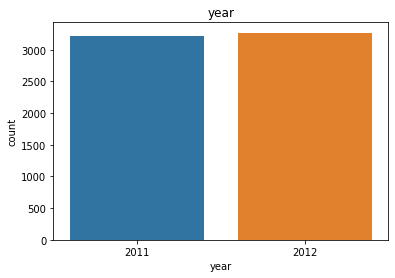

In [2109]:
sns.countplot(x="year", data=test)
plt.title("year")
plt.show()

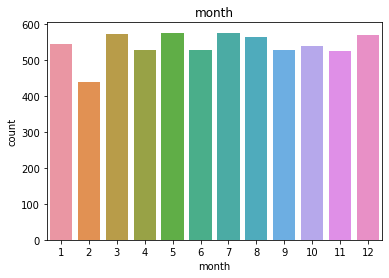

In [2110]:
sns.countplot(x="month", data=test)
plt.title("month")
plt.show()

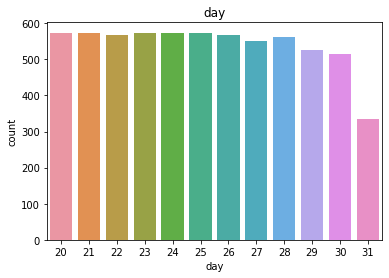

In [2111]:
sns.countplot(x="day", data=test)
plt.title("day")
plt.show()

In [2112]:
set(test['day'].values)

{20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}

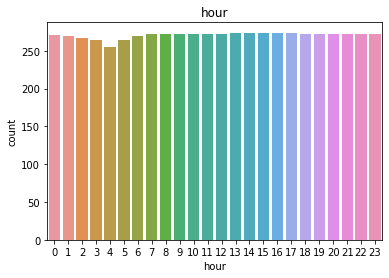

In [2113]:
sns.countplot(x="hour", data=test)
plt.title("hour")
plt.show()

In [2114]:
set(test['day'].values)

{20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}

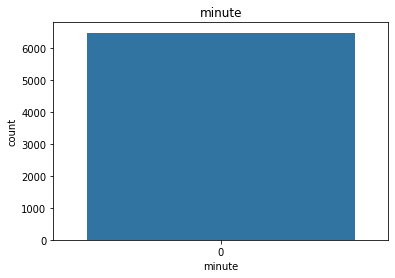

In [2115]:
sns.countplot(x="minute", data=test)
plt.title("minute")
plt.show()

In [2116]:
set(test['minute'].values)

{0}

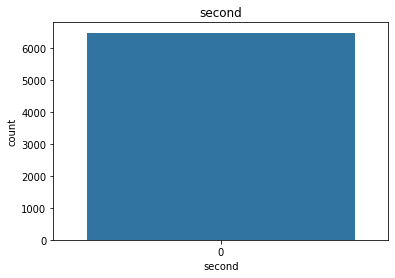

In [2117]:
sns.countplot(x="second", data=test)
plt.title("second")
plt.show()

In [2118]:
set(test['second'].values)

{0}

---
* 중간 점검 (1)
---

    test 데이터에서는, casual 과 registered , count 컬럼이 없다.
    train 에서 casual + registered = count 임을 확인하였다.

    train 과 test 모두,  minute 와 second 는 0 으로 특성으로서의 가치가 없다.

---
* 중간 점검 (2)
---
season, holiday, workingday, weather, temp, atemp, humidity, windspeed 에 대해서도 살펴보자.

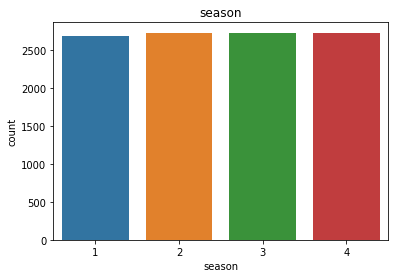

In [2119]:
sns.countplot(x="season", data=train)
plt.title("season")
plt.show()

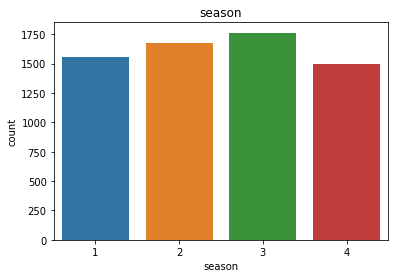

In [2120]:
sns.countplot(x="season", data=test)
plt.title("season")
plt.show()

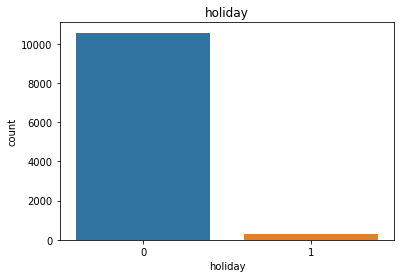

In [2121]:
sns.countplot(x="holiday", data=train)
plt.title("holiday")
plt.show()

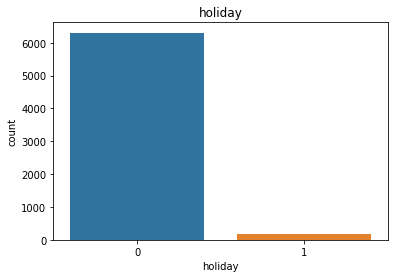

In [2122]:
sns.countplot(x="holiday", data=test)
plt.title("holiday")
plt.show()

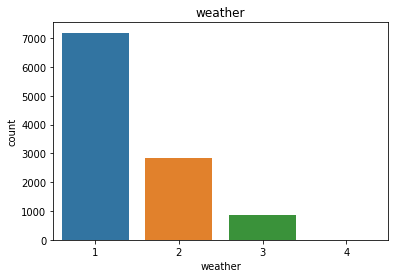

In [2123]:
sns.countplot(x="weather", data=train)
plt.title("weather")
plt.show()

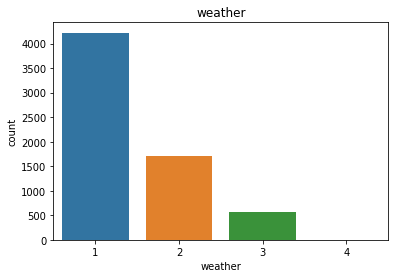

In [2124]:
sns.countplot(x="weather", data=test)
plt.title("weather")
plt.show()

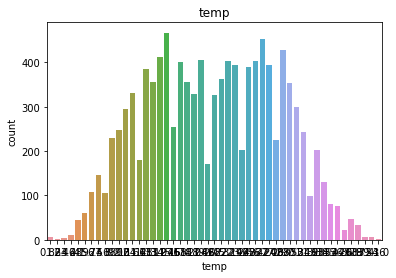

In [2125]:
sns.countplot(x="temp", data=train)
plt.title("temp")
plt.show()

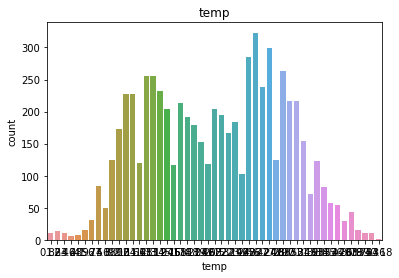

In [2126]:
sns.countplot(x="temp", data=test)
plt.title("temp")
plt.show()

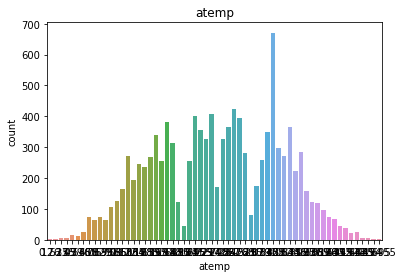

In [2127]:
sns.countplot(x="atemp", data=train)
plt.title("atemp")
plt.show()

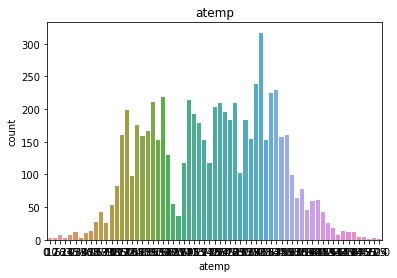

In [2128]:
sns.countplot(x="atemp", data=test)
plt.title("atemp")
plt.show()

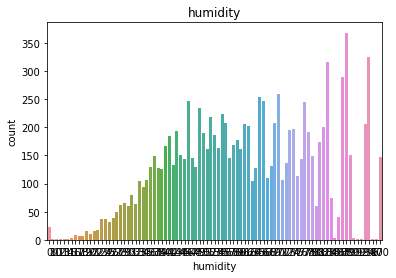

In [2129]:
sns.countplot(x="humidity", data=train)
plt.title("humidity")
plt.show()

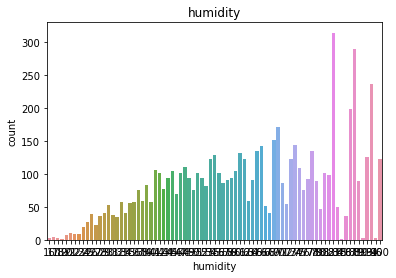

In [2130]:
sns.countplot(x="humidity", data=test)
plt.title("humidity")
plt.show()

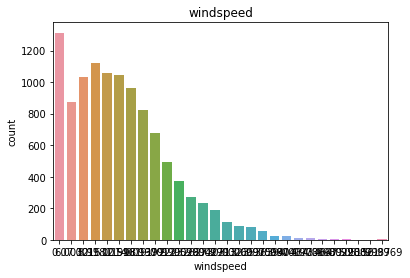

In [2131]:
sns.countplot(x="windspeed", data=train)
plt.title("windspeed")
plt.show()

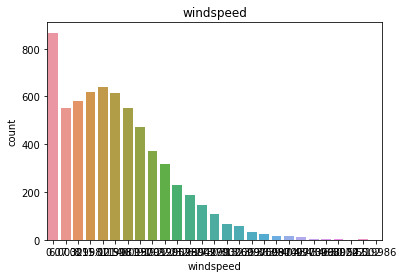

In [2132]:
sns.countplot(x="windspeed", data=test)
plt.title("windspeed")
plt.show()

    train 과 test 를 비교해 보면, 대체로 비슷한 분포로 나뉘어진 것을 알 수 있다.

    그런데... 앞서~~~

    train 의 day 는 1 ~ 19일까지,
    test  의 day 는 20 ~ 30일까지임이 발견되었었다.

In [2133]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

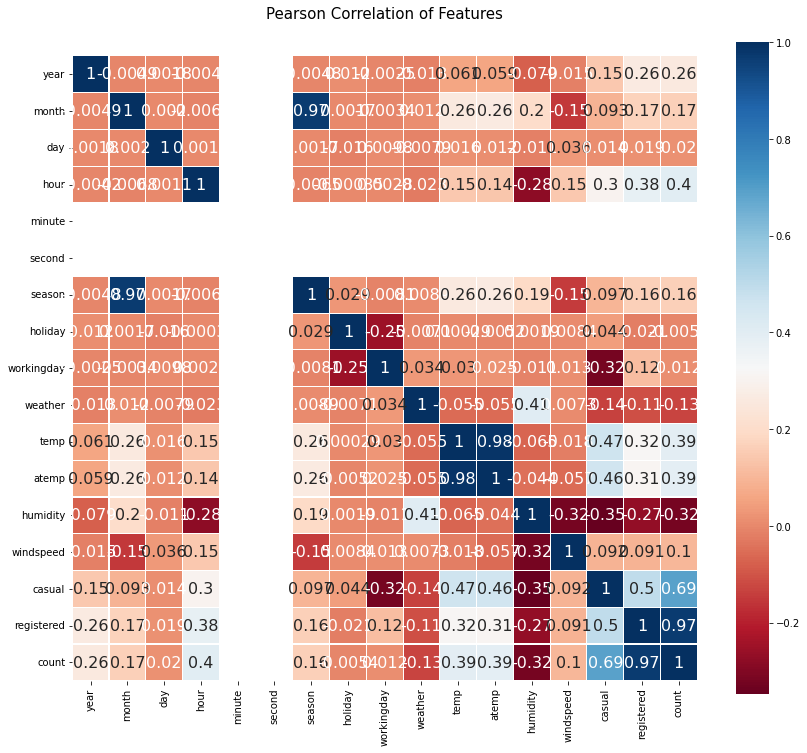

In [2134]:
heatmap_data = train[['year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

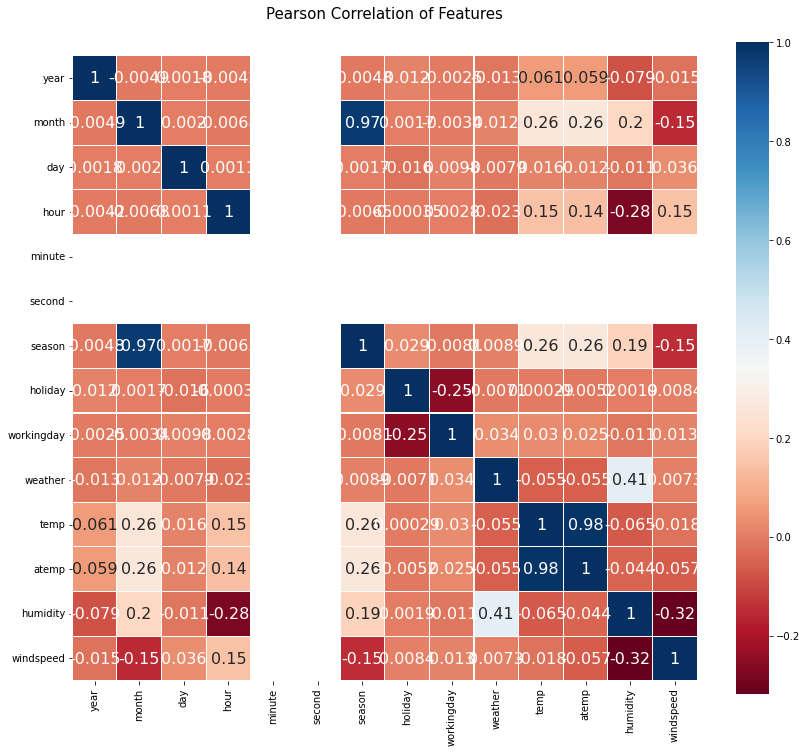

In [2135]:
heatmap_data = train[['year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

---
### (4) X, y 컬럼 선택 및 train/test 데이터 분리
* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.

 ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

---

---
    registered 는 count 와 큰 상관관계를 가진다.
     registered 만 알아도, count를 예측할 수 있을 정도로, count의 대부분을 차지한다.

    test 데이터에서는 casual, registered, count 모두 제공하지 않는다.
    따라서, train 데이터의 casual, registered 는 학습에 포함시킬 필요가 없는 특성이다.

    또한, minute 와 second 는, train 과 test 모두 0 으로,
     의미가 없으므로 제거하고,
    최종 결과에서 0 으로 기록하면 될 것으로 생각합니다.
---

In [2136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [2137]:
# 순서 정렬 (datetime 제거)
train = train[['year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']]

In [2138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10886 non-null  int64  
 1   month       10886 non-null  int64  
 2   day         10886 non-null  int64  
 3   hour        10886 non-null  int64  
 4   minute      10886 non-null  int64  
 5   second      10886 non-null  int64  
 6   season      10886 non-null  int64  
 7   holiday     10886 non-null  int64  
 8   workingday  10886 non-null  int64  
 9   weather     10886 non-null  int64  
 10  temp        10886 non-null  float64
 11  atemp       10886 non-null  float64
 12  humidity    10886 non-null  int64  
 13  windspeed   10886 non-null  float64
 14  casual      10886 non-null  int64  
 15  registered  10886 non-null  int64  
 16  count       10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


* minute 와 second 삭제도 잊지 말자.

In [2139]:
# minute 와 second 를 제거한다.
train.drop(['minute','second'], axis=1, inplace=True)
test.drop(['minute','second'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2140]:
train

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,12,19,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,12,19,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,12,19,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Xcasual + regi

In [2141]:
# X 에는 casual, registered, count 를 제외한 데이터
# y 에는 count 를 저장
X = train.loc[:, 'year':'windspeed'].values
y = train.loc[:,'count'].values

In [2142]:
X.shape

(10886, 12)

In [2143]:
y.shape

(10886,)

In [2144]:
# 데이타를 학습과 평가용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('X_train 개수: ', len(X_train))
print('X_test 개수 : ', len(X_test))

(8708, 12) (8708,)
(2178, 12) (2178,)
X_train 개수:  8708
X_test 개수 :  2178


In [2145]:
X_train.shape, y_train.shape

((8708, 12), (8708,))

In [2146]:
X_test.shape, y_test.shape

((2178, 12), (2178,))

In [2147]:
y_train, y_test

(array([ 35, 450, 276, ..., 234,  22, 358]),
 array([127,  13, 163, ..., 509,   5, 239]))

---
### (5) LinearRegression 모델 학습
* sklearn의 LinearRegression 모델 불러오기 및 학습하기

---

In [2148]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()

print(model_sk._estimator_type)

regressor


In [2149]:
'''
from sklearn.linear_model import SGDRegressor
model_sk = SGDRegressor()

print(model_sk._estimator_type)
'''

'\nfrom sklearn.linear_model import SGDRegressor\nmodel_sk = SGDRegressor()\n\nprint(model_sk._estimator_type)\n'

In [2150]:
# 학습
model_sk.fit(X_train, y_train)

LinearRegression()

---
### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

---

In [2151]:
# 예측
y_sk_pred = model_sk.predict(X_test)
y_sk_pred

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [2152]:
y_sk_pred.shape

(2178,)

In [2153]:
y_sk_pred

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [2154]:
y_test

array([127,  13, 163, ..., 509,   5, 239])

In [2155]:
model_sk.score(X_train, y_train)

0.38757191672163893

In [2156]:
model_sk.score(X_test, y_test)

0.3957218526642503

In [2157]:
model_sk.score(X_test, y_sk_pred)

1.0

###### RMSE (Root Mean Squared Error)

In [2158]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_sk_pred)
mse

19945.3700537542

---
### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

---


In [2159]:
X_test

array([[2.0110e+03, 7.0000e+00, 1.9000e+01, ..., 4.0150e+01, 5.9000e+01,
        0.0000e+00],
       [2.0120e+03, 1.0000e+00, 1.6000e+01, ..., 6.8200e+00, 5.4000e+01,
        6.0032e+00],
       [2.0110e+03, 1.2000e+01, 1.1000e+01, ..., 1.1365e+01, 4.8000e+01,
        1.2998e+01],
       ...,
       [2.0120e+03, 1.1000e+01, 4.0000e+00, ..., 2.0455e+01, 4.0000e+01,
        1.2998e+01],
       [2.0120e+03, 1.0000e+00, 1.0000e+00, ..., 1.4395e+01, 8.1000e+01,
        7.0015e+00],
       [2.0120e+03, 5.0000e+00, 1.5000e+01, ..., 3.0305e+01, 7.3000e+01,
        1.2998e+01]])

In [2160]:
type(X_test)

numpy.ndarray

In [2161]:
X_test.shape

(2178, 12)

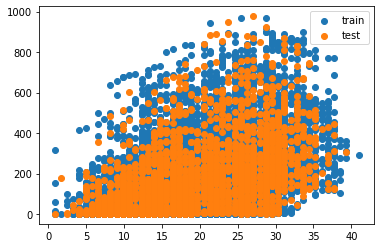

In [2162]:
# temp (실제값)
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 8], y_train, label="train")
plt.scatter(X_test[:, 8], y_test, label="test")
plt.legend()
plt.show()

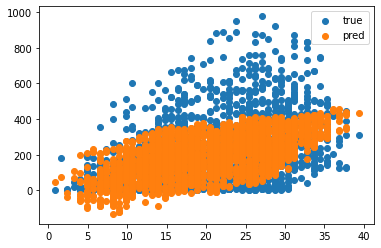

In [2163]:
# temp
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 8], y_test, label="true")
plt.scatter(X_test[:, 8], y_sk_pred, label="pred")
plt.legend()
plt.show()

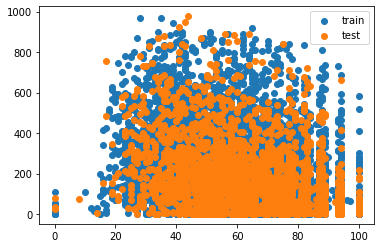

In [2164]:
# humidity (실제값)
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 10], y_train, label="train")
plt.scatter(X_test[:, 10], y_test, label="test")
plt.legend()
plt.show()

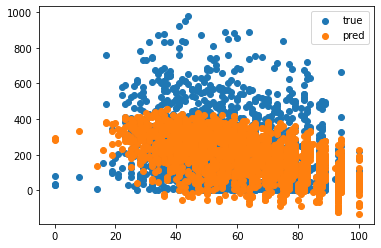

In [2165]:
# humidity
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 10], y_test, label="true")
plt.scatter(X_test[:, 10], y_sk_pred, label="pred")
plt.legend()
plt.show()

### (8) 하이퍼 파라미터 인 학습률 설정하기

In [2166]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.1

### (9) 모델 학습하기

#### X_train

In [2167]:
X_train

array([[2.01100e+03, 7.00000e+00, 6.00000e+00, ..., 3.18200e+01,
        8.30000e+01, 6.00320e+00],
       [2.01200e+03, 8.00000e+00, 4.00000e+00, ..., 4.09100e+01,
        3.90000e+01, 1.99995e+01],
       [2.01200e+03, 7.00000e+00, 1.10000e+01, ..., 3.56050e+01,
        4.10000e+01, 1.69979e+01],
       ...,
       [2.01100e+03, 1.20000e+01, 1.80000e+01, ..., 1.36350e+01,
        4.80000e+01, 1.69979e+01],
       [2.01100e+03, 2.00000e+00, 1.90000e+01, ..., 1.96950e+01,
        1.70000e+01, 3.50008e+01],
       [2.01200e+03, 5.00000e+00, 2.00000e+00, ..., 2.57600e+01,
        8.80000e+01, 1.29980e+01]])

#### W , b

In [2168]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [2169]:
W

array([0.87141446, 0.47184405, 0.39907979, 0.02903661, 0.88604394,
       0.02217605, 0.26880835, 0.29349504, 0.47416936, 0.81889162,
       0.19891439, 0.81265322])

In [2170]:
b

0.8287648491677145

#### 모델

In [2171]:
### 모델
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [2172]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [2173]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [2174]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [2175]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [5.92681324e+09 1.90588436e+07 2.94323328e+07 3.31167783e+07
 7.33610306e+06 8.44731621e+04 2.00480377e+06 4.20755794e+06
 5.87542356e+07 6.87797080e+07 1.84412259e+08 3.75103220e+07]
db: 3248.0058057961837


In [2176]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


Iteration 200 : Loss nan
Iteration 300 : Loss nan
Iteration 400 : Loss nan
Iteration 500 : Loss nan
Iteration 600 : Loss nan
Iteration 700 : Loss nan
Iteration 800 : Loss nan
Iteration 900 : Loss nan
Iteration 1000 : Loss nan
Iteration 1100 : Loss nan
Iteration 1200 : Loss nan
Iteration 1300 : Loss nan
Iteration 1400 : Loss nan
Iteration 1500 : Loss nan
Iteration 1600 : Loss nan
Iteration 1700 : Loss nan
Iteration 1800 : Loss nan
Iteration 1900 : Loss nan
Iteration 2000 : Loss nan
Iteration 2100 : Loss nan
Iteration 2200 : Loss nan
Iteration 2300 : Loss nan
Iteration 2400 : Loss nan
Iteration 2500 : Loss nan
Iteration 2600 : Loss nan
Iteration 2700 : Loss nan
Iteration 2800 : Loss nan
Iteration 2900 : Loss nan
Iteration 3000 : Loss nan


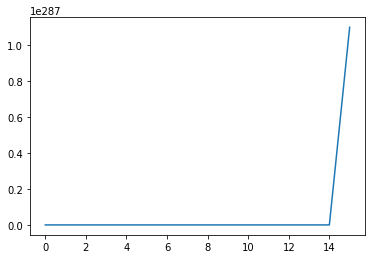

In [2177]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [2178]:
W, b

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), nan)

### (10) test 데이터에 대한 성능 확인하기

In [2179]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

nan

### (11) 정답 데이터와 예측한 데이터 시각화 하기

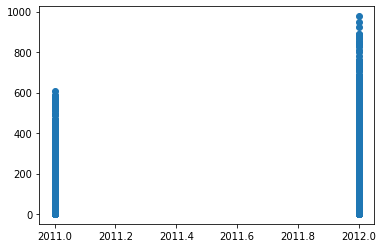

In [2180]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

---
---
---
## 회고
---
---
---



    잘 모르는 상태에서 여러 번 값을 바꾸어 보면서 돌려보다가,
    이러한 데이터에 대하여, 단지 선형회귀 모델만 적용해서 돌리면 되는 것인가 하는 생각이 들었다.

    그나마, 습도와 온도 기준으로 보았을 때,
    사이킷런은 선형회귀 모델이 지향하는 형태를 보여주면서,
     (그 때문에 평향적이 되었지만)
    선방하였으나,

    자체 모델은,
    공부를 더 하고 다시 봐야겠다는 생각이 들었다.